# Ordinary Least Squares

In [91]:
import plotly.plotly as py
import plotly.figure_factory as ff
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## OLS Model of 5 year estimate

### Import data

In [2]:
#import estimates of population and attributes.
df = pd.read_csv('03-25-19-estimate-5yrs')

#import estimates of uninsured population and attributes.
df1 = pd.read_csv('03-25-19-estimate-uninsured-5yrs')

#Calculating additional attributes.
df['total estimate insured'] = df['Total; Estimate; Total civilian noninstitutionalized population'] - df1['Total Uninsured; Estimate; Total civilian noninstitutionalized population']
df['percentage insured'] = df['total estimate insured'] /  df['Total; Estimate; Total civilian noninstitutionalized population']

### Shape of the data

In [4]:
print("Shape of 5 year estimate data:",df.shape)
print("Shape of 5 year uninsured estimate data:",df1.shape)

Shape of 5 year estimate data: (751, 59)
Shape of 5 year uninsured estimate data: (751, 59)


#### Fit and Summary

In [5]:
y = df['percentage insured']
X = df.iloc[:,6:57]

X = sm.add_constant(X)

res = sm.OLS(y.astype(float),X.astype(float)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     percentage insured   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     62.91
Date:                Tue, 26 Mar 2019   Prob (F-statistic):          1.28e-220
Time:                        09:59:10   Log-Likelihood:                 1837.9
No. Observations:                 751   AIC:                            -3578.
Df Residuals:                     702   BIC:                            -3351.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================================================
                                                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                 -0.0003      0.000     -1.118      0.264      -0.001       0.000
Total; Estimate; AGE - 65 years and older                                                                                             -0.0010      0.016     -0.062      0.951      -0.033       0.031
Total; Estimate; AGE - 65 years and older - 65 to 74 years                                                                            -0.0042      0.016     -0.263      0.793      -0.036       0.027
Total; Estimate; AGE - 65 years and older - 75 years and older                                                                         0.0003      0.016      0.018      0.986      -0.031       0.032
Total; Estimate; Median age (years)                                                                                                    0.0031      0.001      3.944      0.000       0.002       0.005
Total; Estimate; SEX - Male                                                                                                           -0.0147      0.012     -1.214      0.225      -0.038       0.009
Total; Estimate; SEX - Female                                                                                                         -0.0123      0.012     -1.018      0.309      -0.036       0.011
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race                                                                        -0.0120      0.014     -0.887      0.375      -0.039       0.015
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - White alone                                                          -0.0059      0.011     -0.550      0.583      -0.027       0.015
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American alone                                      -0.0024      0.011     -0.223      0.824      -0.023       0.019
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native alone                              -0.0036      0.011     -0.338      0.735      -0.025       0.017
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Native Hawaiian and Other Pacific Islander alone                      0.0028      0.011      0.256      0.798      -0.019       0.024
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - Two or more races                           

## OLS Model of 1 year estimate

In [6]:
#import estimates of population and attributes.
df_one = pd.read_csv('03-25-19-estimate-1yr')

#import estimates of uninsured population and attributes.
df_un_one = pd.read_csv('03-25-19-estimate-uninsured-1yr')

#Calculating additional attributes.
df_one['total estimate insured'] = df_one['Total; Estimate; Total civilian noninstitutionalized population'] - df_un_one['Total Uninsured; Estimate; Total civilian noninstitutionalized population']
df_one['percentage insured'] = df_one['total estimate insured'] /  df_one['Total; Estimate; Total civilian noninstitutionalized population']

In [7]:
print("Shape of 1 year estimate data:",df_one.shape)
print("Shape of 1 year uninsured estimate data:",df_un_one.shape)

Shape of 1 year estimate data: (69, 59)
Shape of 1 year uninsured estimate data: (69, 59)


In [8]:
y = df_one['percentage insured']
X = df_one.iloc[:,6:57]
X = sm.add_constant(X)
est = sm.OLS(y.astype(float),X.astype(float)).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     percentage insured   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     7.532
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           4.74e-06
Time:                        09:59:15   Log-Likelihood:                 218.58
No. Observations:                  69   AIC:                            -339.2
Df Residuals:                      20   BIC:                            -229.7
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================================================================================
                                                                                                                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                 -0.0004      0.001     -0.304      0.765      -0.003       0.002
Total; Estimate; AGE - 65 years and older                                                                                             -0.1105      0.105     -1.054      0.305      -0.329       0.108
Total; Estimate; AGE - 65 years and older - 65 to 74 years                                                                             0.1085      0.102      1.063      0.300      -0.104       0.321
Total; Estimate; AGE - 65 years and older - 75 years and older                                                                         0.1128      0.103      1.094      0.287      -0.102       0.328
Total; Estimate; Median age (years)                                                                                                   -0.0007      0.007     -0.105      0.918      -0.015       0.014
Total; Estimate; SEX - Male                                                                                                           -0.0074      0.057     -0.131      0.897      -0.126       0.111
Total; Estimate; SEX - Female                                                                                                         -0.0283      0.061     -0.463      0.648      -0.156       0.099
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race                                                                        -0.0267      0.071     -0.377      0.710      -0.175       0.121
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - White alone                                                           0.0098      0.051      0.193      0.849      -0.096       0.116
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American alone                                       0.0128      0.051      0.250      0.805      -0.094       0.119
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native alone                               0.0036      0.049      0.073      0.943      -0.099       0.106
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Native Hawaiian and Other Pacific Islander alone                      0.0032      0.047      0.068      0.947      -0.095       0.101
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - Two or more races                           

### Difference of Coef (5 year - 1 year) 

In [14]:
diff = pd.DataFrame(res.params - est.params, columns = ['Difference'])
diff

,Difference
const,8.761586e-05
Total; Estimate; AGE - 65 years and older,1.095241e-01
Total; Estimate; AGE - 65 years and older - 65 to 74 years,-1.127477e-01
Total; Estimate; AGE - 65 years and older - 75 years and older,-1.125458e-01
Total; Estimate; Median age (years),3.819036e-03
Total; Estimate; SEX - Male,-7.224039e-03
Total; Estimate; SEX - Female,1.598563e-02
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race,1.469220e-02
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - White alone,-1.562333e-02
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American alone,-1.515429e-02


### Proof-of-Concept

In [23]:
# List of difference, 'Const' is removed
diff_list = diff['Difference'].tolist()[1:]

# Making a copy 
test = df[df.columns[7:-2]].copy()

In [58]:
# Multiply every columns with the difference
columns =  test.columns
weighted_lists = []
for column, d in zip (columns,diff_list[1:]):
    weighted_column = np.array(test[column])*d
    weighted_lists.append(weighted_column)

In [109]:
# Raw Score Computation: Transpose and add values of all columns
scores_counties = pd.DataFrame(weighted_lists).T.sum(axis=1)
fips = [str(f).zfill(5) for f in df['Id2'].tolist()]

# Creating Dataframe
county_names = df['Geography'].tolist()

df_score = pd.DataFrame({'FIPS':fips,'County': county_names, 'Raw Score': scores_counties})

# Scale
df_score['Scaled Score'] =  preprocessing.scale(df_score['Raw Score'])

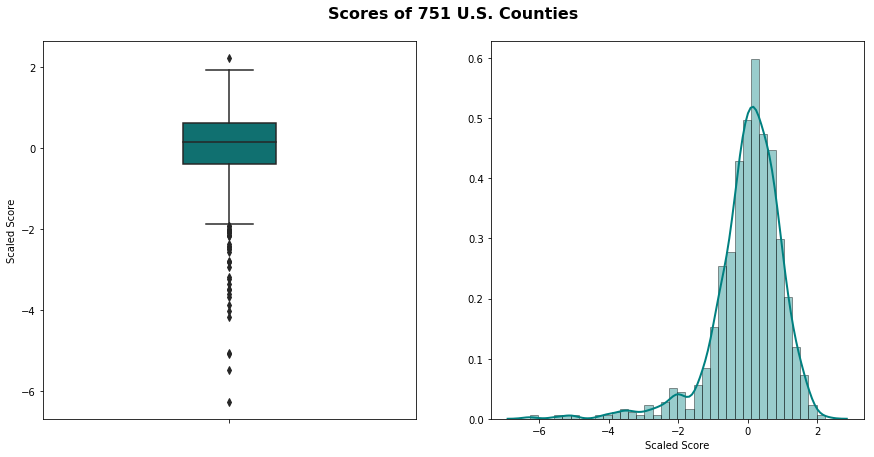

In [138]:
# Visualize Scores
plt.figure(figsize=(12,6))
plt.subplots_adjust(bottom=0.025, left=0.025, top = 0.9, right=0.975)
plt.suptitle("Scores of 751 U.S. Counties", fontsize = 16,fontweight = 'bold')

plt.subplot(1,2,1)
ax_1 = sns.boxplot(x = df_score["Scaled Score"], color = 'teal', orient='v', width=.25)


plt.subplot(1,2,2)
sns.distplot(df_score['Scaled Score'], hist=True, kde=True, 
             bins=int(180/5), color = 'teal', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2}, label="US")
plt.show()


In [120]:
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]

endpts = list(np.linspace(-6.272508e+00, 2.215273e+00, len(colorscale) - 1))

scores = df_score['Scaled Score'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=scores,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Scores of 751 counties',
    legend_title='Scores'
)
py.iplot(fig, filename='choropleth_full_usa')

### Top 10

In [136]:
df_score.sort_values(by='Scaled Score', ascending=False).head(20)

,County,FIPS,Raw Score,Scaled Score
393,"McKinley County, New Mexico",35031,-0.768213,2.215273
689,"Utah County, Utah",49049,-0.892178,1.910314
706,"Harrisonburg city, Virginia",51660,-0.930487,1.816073
681,"Webb County, Texas",48479,-0.944148,1.782466
156,"Clayton County, Georgia",13063,-0.958495,1.747172
698,"Loudoun County, Virginia",51107,-0.960268,1.742811
718,"Franklin County, Washington",53021,-0.979352,1.695862
675,"Travis County, Texas",48453,-0.995063,1.657214
686,"Cache County, Utah",49005,-0.998785,1.648058
171,"Gwinnett County, Georgia",13135,-1.005027,1.632702


In [135]:
scores= df_score.sort_values(by='Scaled Score', ascending=False).head(20)['Scaled Score']
fips = df_score.sort_values(by='Scaled Score', ascending=False).head(20)['FIPS']
fig = ff.create_choropleth(
    fips=fips, values=scores,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Scores of 751 counties',
    legend_title='Scores'
)
py.iplot(fig, filename='choropleth_full_usa')

In [134]:
df_score.sort_values(by='Scaled Score', ascending=True).head(20)

,County,FIPS,Raw Score,Scaled Score
109,"Charlotte County, Florida",12015,-4.218470,-6.272508
110,"Citrus County, Florida",12017,-3.898851,-5.486231
143,"Sarasota County, Florida",12115,-3.739614,-5.094503
120,"Highlands County, Florida",12055,-3.732048,-5.075889
122,"Indian River County, Florida",12061,-3.368816,-4.182322
112,"Collier County, Florida",12021,-3.305366,-4.026233
128,"Martin County, Florida",12085,-3.252675,-3.896612
28,"Mohave County, Arizona",04015,-3.165382,-3.681867
127,"Marion County, Florida",12083,-3.138104,-3.614761
117,"Flagler County, Florida",12035,-3.101654,-3.525093


In [133]:
scores= df_score.sort_values(by='Scaled Score', ascending=True).head(20)['Scaled Score']
fips = df_score.sort_values(by='Scaled Score', ascending=True).head(20)['FIPS']
fig = ff.create_choropleth(
    fips=fips, values=scores,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Scores of 751 counties',
    legend_title='Scores'
)
py.iplot(fig, filename='choropleth_full_usa')

## Testing Assumptions

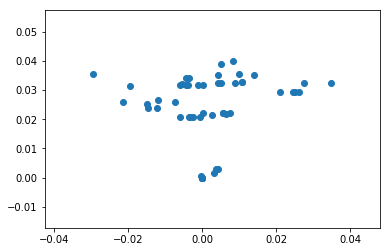

In [10]:
# print('Parameters: ', est.bse)
# print('Standard errors: ', est.bse)
# print('Predicted values: ', est.predict())
err_series = res.params - res.conf_int()[0]
plt.scatter(res.params,err_series)
plt.show()

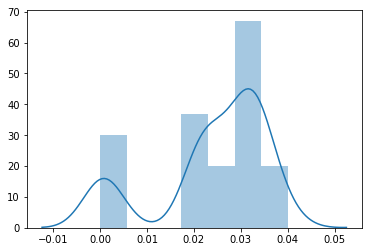

In [75]:
import seaborn as sns
sns.distplot(err_series);